<a href="https://colab.research.google.com/github/juaumm/PythonNotebooks/blob/main/NLPproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the dataset and clone github repository
!wget https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv -O pre-processed.csv
!git clone https://github.com/N-CPUninter/NLP.git
!rm ./NLP/*.ipynb
!mv ./NLP/* .
!rm -r NLP

--2024-09-02 13:11:03--  https://raw.githubusercontent.com/roneysco/Fake.br-Corpus/master/preprocessed/pre-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20434897 (19M) [text/plain]
Saving to: ‘pre-processed.csv’

pre-processed.csv   100%[===================>]  19.49M  --.-KB/s    in 0.1s    

2024-09-02 13:11:04 (146 MB/s) - ‘pre-processed.csv’ saved [20434897/20434897]

Cloning into 'NLP'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 34 (delta 9), reused 25 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 1.27 MiB | 11.96 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [2]:
# Installing libraries
!pip install nltk scikit-learn pandas numpy matplotlib wordcloud
import nltk
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from nltk import ngrams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from funcoes_auxiliares import gerar_nuvem_palavras

nltk.download("all")


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [3]:
# loading the data into a dataframe "df"
df = pd.read_csv('pre-processed.csv')

In [ ]:
# Display the first few rows of the dataset
print(df.head())

   index label                                  preprocessed_news
0      0  fake  katia abreu diz vai colocar expulsao moldura n...
1      1  fake  ray peita bolsonaro conservador fake entrevist...
2      2  fake  reinaldo azevedo desmascarado policia federal ...
3      3  fake  relatorio assustador bndes mostra dinheiro pub...
4      4  fake  radialista americano fala sobre pt vendem ilus...


In [ ]:
# Display basic information about the dataframe
print("\nDataset Information:\n")
print(df.info())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              7200 non-null   int64 
 1   label              7200 non-null   object
 2   preprocessed_news  7200 non-null   object
dtypes: int64(1), object(2)
memory usage: 168.9+ KB
None


In [ ]:
# Display the distribution of the labels (FAKE/REAL)
print("\nLabel Distribution:\n")
print(df['label'].value_counts())


Label Distribution:

label
fake    3600
true    3600
Name: count, dtype: int64


In [ ]:
#check for blanks
blanks = []

for index,text in df["preprocessed_news"].items():
  if text.isspace():
    blanks.append(index)

len(blanks)

0

In [4]:
# Instaling more libraries
import unicodedata
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Creates a funtion to remove inconsistencies
def preprocess_text(text):
    # 1.2. Remove accents
    def remove_accents(text):
        nfkd = unicodedata.normalize('NFKD', text)
        return ''.join([c for c in nfkd if not unicodedata.combining(c)])

    # Remove accents and numbers
    text_no_accents = remove_accents(text)
    text_no_numbers = re.sub(r'\d+', '', text_no_accents)

    # 1.3. Convert to lowercase
    text_lower = text_no_numbers.lower()

    # 1.4. Remove stopwords and punctuation
    stop_words = set(stopwords.words('portuguese'))
    tokens = nltk.word_tokenize(text_lower)
    tokens_no_stopwords = [word for word in tokens if word not in stop_words and word not in string.punctuation]

    # 1.5. Apply stemming
    stemmer = RSLPStemmer()
    stems = [stemmer.stem(word) for word in tokens_no_stopwords]

    # Return the processed text as a single string
    return ' '.join(stems)

In [7]:
# Creates a new column with the processed data
df['processed_news'] = df['preprocessed_news'].apply(preprocess_text)


print(df[['preprocessed_news', 'processed_news']].head())


                                   preprocessed_news  \
0  katia abreu diz vai colocar expulsao moldura n...   
1  ray peita bolsonaro conservador fake entrevist...   
2  reinaldo azevedo desmascarado policia federal ...   
3  relatorio assustador bndes mostra dinheiro pub...   
4  radialista americano fala sobre pt vendem ilus...   

                                      processed_news  
0  kat abr diz vai coloc expulsa mold nao reclam ...  
1  ray peit bolsonar conserv fak entrev danil gen...  
2  reinald azeved desmascar polic feder ferrenh c...  
3  relatori assust bnd mostr dinh publ brasil jor...  
4  radial americ fal sobr pt vend ilusa pov brasi...  


In [8]:
# Creates a new dataframe with all true processed_news
df_true = df[df['label'] == 'true'][['processed_news']]

df_true.head()


,processed_news
3600,pod decid expuls deput feder carl gaguim part ...
3601,bolsonar liberal complet diz presid psl part p...
3602,ministr stf lib andre nev prisa domicili decis...
3603,apes abundanc cresc preocupaca preservaca font...
3604,harvard mit levara dilm mor suplicy eua megaco...


In [9]:
# Creates a dataframe with all fake processed_news
df_fake = df[df['label'] == 'fake'][['processed_news']]

df_fake.head()

,processed_news
0,kat abr diz vai coloc expulsa mold nao reclam ...
1,ray peit bolsonar conserv fak entrev danil gen...
2,reinald azeved desmascar polic feder ferrenh c...
3,relatori assust bnd mostr dinh publ brasil jor...
4,radial americ fal sobr pt vend ilusa pov brasi...


In [10]:
# Display the sum of words in both datasets
print(df_true['processed_news'].apply(lambda x: len(x.split(' '))).sum())
print(df_fake['processed_news'].apply(lambda x: len(x.split(' '))).sum())

2238797
386704


In [11]:
# Normalize the quantity of words in both datasets

# Calculate the total number of words in each category
total_words_true = df_true['processed_news'].apply(lambda x: len(x.split(' '))).sum()
total_words_fake = df_fake['processed_news'].apply(lambda x: len(x.split(' '))).sum()

# Calculate the average number of words per document in each category
avg_words_true = total_words_true / len(df_true)
avg_words_fake = total_words_fake / len(df_fake)

# Print the average number of words per document in each category
print(f"Average words per document in true news: {avg_words_true:.2f}")
print(f"Average words per document in fake news: {avg_words_fake:.2f}")

# Normalize the number of words in each document
df_true['normalized_news'] = df_true['processed_news'].apply(lambda x: ' '.join(x.split(' ')[:int(avg_words_fake)]))
df_fake['normalized_news'] = df_fake['processed_news'].apply(lambda x: ' '.join(x.split(' ')[:int(avg_words_fake)]))

print(df_true['normalized_news'].apply(lambda x: len(x.split(' '))).sum())
print(df_fake['normalized_news'].apply(lambda x: len(x.split(' '))).sum())


Average words per document in true news: 621.89
Average words per document in fake news: 107.42
384328
304477


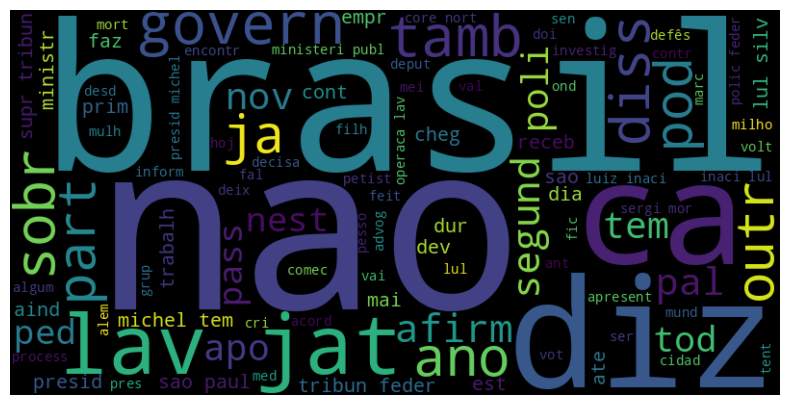

In [12]:
# Display a word cloud of the most common words in df_true-normalized_news
true_news = ' '.join(df_true['normalized_news'])
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(true_news)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

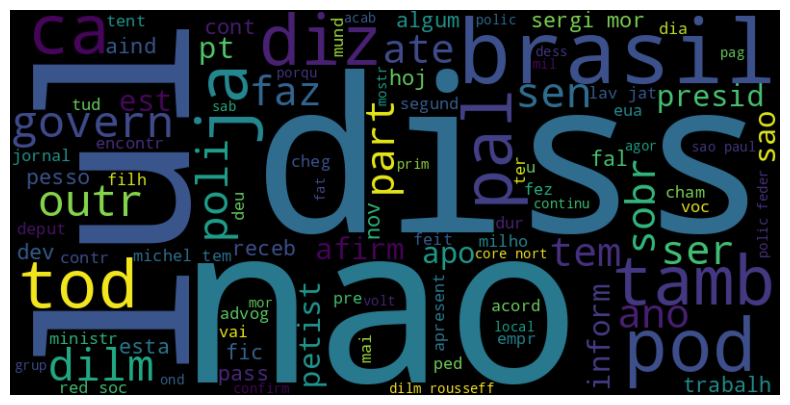

In [13]:
# Display a word cloud of the most common words in df_fake-normalized_news
fake_news = ' '.join(df_fake['normalized_news'])
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(fake_news)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
# Creates a new dataframe

# Create a new column 'label' with 'fake' for df_fake
df_fake['label'] = 'fake'

# Create a new column 'label' with 'true' for df_true
df_true['label'] = 'true'

# Concatenate the dataframes
df_new = pd.concat([df_fake, df_true], ignore_index=True)

df_new.head()


,processed_news,normalized_news,label
0,kat abr diz vai coloc expulsa mold nao reclam ...,kat abr diz vai coloc expulsa mold nao reclam ...,fake
1,ray peit bolsonar conserv fak entrev danil gen...,ray peit bolsonar conserv fak entrev danil gen...,fake
2,reinald azeved desmascar polic feder ferrenh c...,reinald azeved desmascar polic feder ferrenh c...,fake
3,relatori assust bnd mostr dinh publ brasil jor...,relatori assust bnd mostr dinh publ brasil jor...,fake
4,radial americ fal sobr pt vend ilusa pov brasi...,radial americ fal sobr pt vend ilusa pov brasi...,fake


In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   processed_news   7200 non-null   object
 1   normalized_news  7200 non-null   object
 2   label            7200 non-null   object
dtypes: object(3)
memory usage: 168.9+ KB


In [18]:
# making sure all libraries are installed
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
# 1. Creates a TF-IDF Matrix
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000)
X_tfidf = vectorizer.fit_transform(df_new['normalized_news'])

In [25]:
# 2. Spliting the matrix into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df_new['label'], test_size=0.3, random_state=42)



In [26]:
# 3. Training the model with Logistic Regression and lbfgs solver
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
# 4. Making predictions with predict_proba
y_pred_proba = model.predict_proba(X_test)

In [28]:
# 5. Convert probabilities
y_pred = (y_pred_proba[:, 1] >= 0.5).astype(int)  # "1" for "true" and "0" for"fake"

In [29]:
# 6. Acuracy Calculation
# Convert y_pred to strings to match y_test
y_pred = ['true' if p == 1 else 'fake' for p in y_pred]

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.90


Nuvem de palavras para textos verdadeiros:
 RU 4224949  * Um total de 572691 tokens foram computados a partir do conjunto de dados.



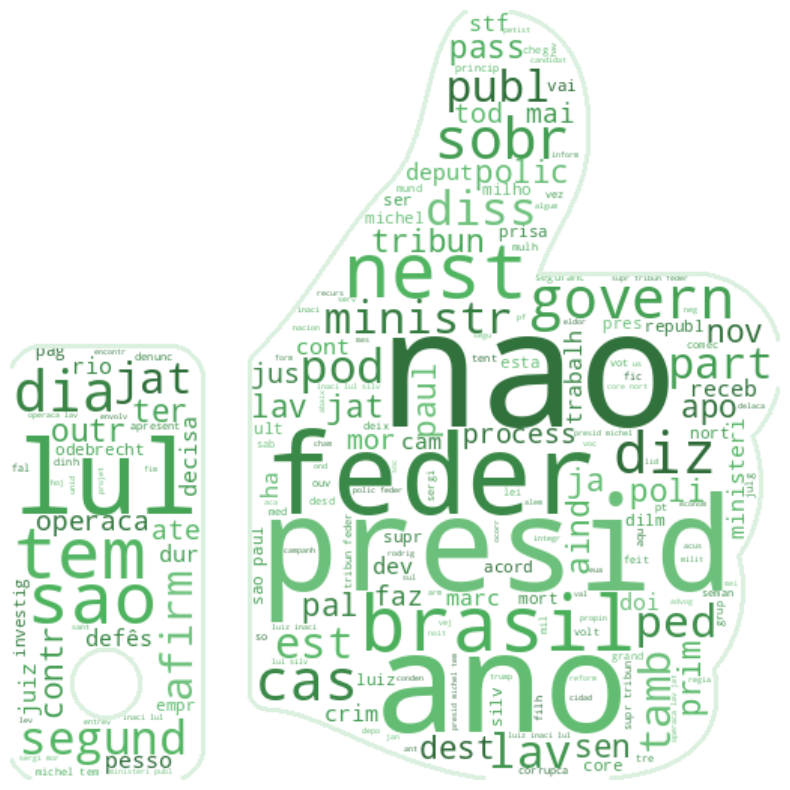

Nuvem de palavras para textos falsos:
 RU 4224949  * Um total de 484064 tokens foram computados a partir do conjunto de dados.



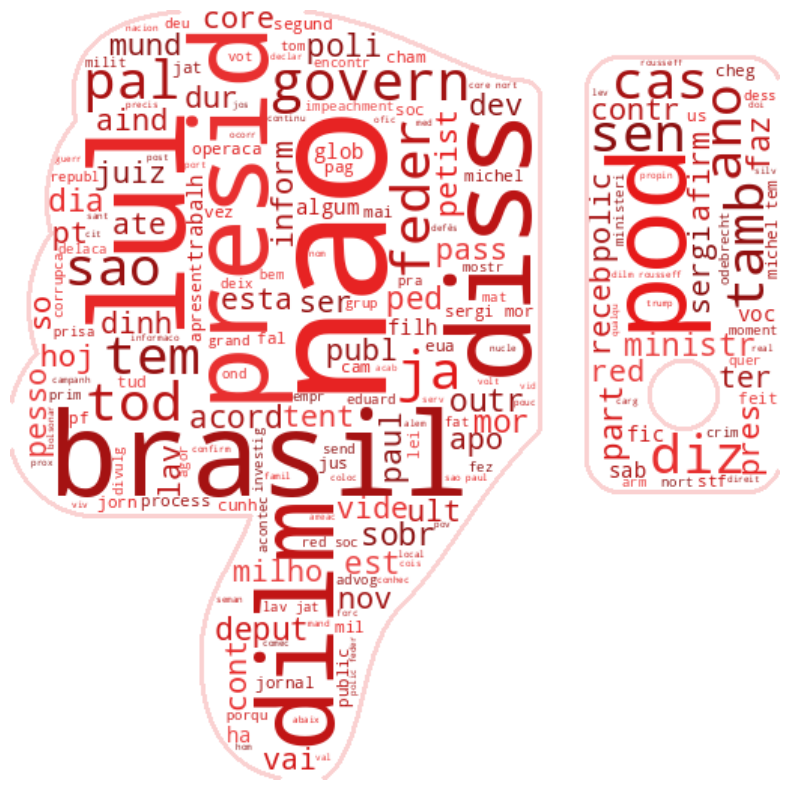

In [31]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from nltk import ngrams

def gerar_nuvem_palavras(arquivo_mascara="cloud_mask.png",
                         dicionario_tokens_e_frequencia={'exemplo':1,
                                     'exemplo bigramas':2,
                                     'exemplo de trigrama':1,
                                     'ALTERAR':3}):

    # Seletor de função de cor
    def color_function(mask):
        if mask == "mapa_brasil_mask.png":
            def color_func(word, font_size, position, orientation, random_state=None,**kwargs):
                return "hsl(190, 40%%, %d%%)" % random.randint(30, 60) #sky
            color_cont = (219, 236, 240)
        elif mask == "thumbs_down_mask.png":
            def color_func(word, font_size, position, orientation, random_state=None,**kwargs):
                return "hsl(0, 80%%, %d%%)" % random.randint(30, 60) #fake
            color_cont = (250, 209, 209)
        elif mask == "thumbs_up_mask.png":
            def color_func(word, font_size, position, orientation, random_state=None,**kwargs):
                return "hsl(130, 40%%, %d%%)" % random.randint(30, 60) #real
            color_cont = (219, 240, 223)
        else:
            def color_func(word, font_size, position, orientation, random_state=None,**kwargs):
                return "hsl(0, 0%%, %d%%)" % random.randint(60, 100) #grey
            color_cont = (219, 236, 240)
        return color_func, color_cont

    color_function, color_cont = color_function(arquivo_mascara)

    imagem_mascara = np.array(Image.open(os.path.join("data", "img", arquivo_mascara)))

    print(f" RU 4224949  * Um total de {len(dicionario_tokens_e_frequencia)} tokens foram "+
        "computados a partir do conjunto de dados.\n")
    nuvem_palavras = WordCloud(
                            width=1080,
                            height=1080,
                            max_font_size=110,
                            background_color="white",
                            collocations=False,
                            mask=imagem_mascara,
                            contour_width=3,
                            contour_color = color_cont
                            ).generate_from_frequencies(dicionario_tokens_e_frequencia)
    nuvem_palavras.recolor(color_func=color_function, random_state=3)

    plt.figure(figsize=(12, 10))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

    return nuvem_palavras, len(dicionario_tokens_e_frequencia)

def processar_e_gerar_nuvem(df, label, mask_image):
    # Filtrar os textos baseados no rótulo (true ou fake)
    texts = df_new[df_new['label'] == label]['normalized_news']

    # Vetorização e contagem de frequência de unigrama, bigrama e trigrama
    vectorizer = CountVectorizer(ngram_range=(1, 3))
    bag_of_words = vectorizer.fit_transform(texts)
    sum_words = bag_of_words.sum(axis=0)

    # Criar dicionário de tokens e suas frequências
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    words_dict = dict(words_freq)

    # Gerar nuvem de palavras
    gerar_nuvem_palavras(dicionario_tokens_e_frequencia=words_dict, arquivo_mascara=mask_image)

def main():
    # Gerar nuvem de palavras para textos verdadeiros
    print("Nuvem de palavras para textos verdadeiros:")
    processar_e_gerar_nuvem(df_new, label='true', mask_image='thumbs_up_mask.png')

    # Gerar nuvem de palavras para textos falsos
    print("Nuvem de palavras para textos falsos:")
    processar_e_gerar_nuvem(df_new, label='fake', mask_image='thumbs_down_mask.png')

# Executar a função main
if __name__ == '__main__':
    main()


In [33]:
# Count of words, bigrams, and trigrams were used from the texts labeled as true and false

def contar_ngramas(df_new, label):
    # Filtrar os textos baseados no rótulo (true ou fake)
    texts = df_new[df_new['label'] == label]['normalized_news']

    # Vetorização e contagem de frequência de unigrama, bigrama e trigrama
    vectorizer = CountVectorizer(ngram_range=(1, 3))
    bag_of_words = vectorizer.fit_transform(texts)
    sum_words = bag_of_words.sum(axis=0)

    # Contar o número de unigramas, bigramas e trigramas
    unigrams = sum([len(word.split()) == 1 for word in vectorizer.get_feature_names_out()])
    bigrams = sum([len(word.split()) == 2 for word in vectorizer.get_feature_names_out()])
    trigrams = sum([len(word.split()) == 3 for word in vectorizer.get_feature_names_out()])

    print(f"Textos rotulados como '{label}':")
    print(f"  Unigramas: {unigrams}")
    print(f"  Bigramas: {bigrams}")
    print(f"  Trigramas: {trigrams}")


# Contar ngramas para textos verdadeiros
contar_ngramas(df_new, 'true')

# Contar ngramas para textos falsos
contar_ngramas(df_new, 'fake')


Textos rotulados como 'true':
  Unigramas: 15147
  Bigramas: 230905
  Trigramas: 326639
Textos rotulados como 'fake':
  Unigramas: 13098
  Bigramas: 197918
  Trigramas: 273048
